<a href="https://colab.research.google.com/github/Ashu10051998/project-on-Customer-Segementation-in-Unsupervised-ML-/blob/main/Copy_of_Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Mounting Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
#Importing Data
df = pd.read_excel('/content/drive/MyDrive/Data/Online Retail.xlsx')

In [35]:
df.shape

(541909, 8)

In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [7]:
#Having a descriptive look on the dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#From the description we can see that

From the quantity section We see that 10 goods being sold on an average with a standard deviation of around 218. Also, the minimum quantity includes a negative value, this implies that the dataset also the includes returned items.

Same case with the unitprice section also.It also consists dataset of returned items with some outliars in the section.

Customer id's mean/std is of no relevance to us.

In [21]:
df['CustomerID'].nunique()

4372

So there are 4372 different customers.

In [ ]:
df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

So most of the data is from United kingdome.Visualizing it from a bar graph we get

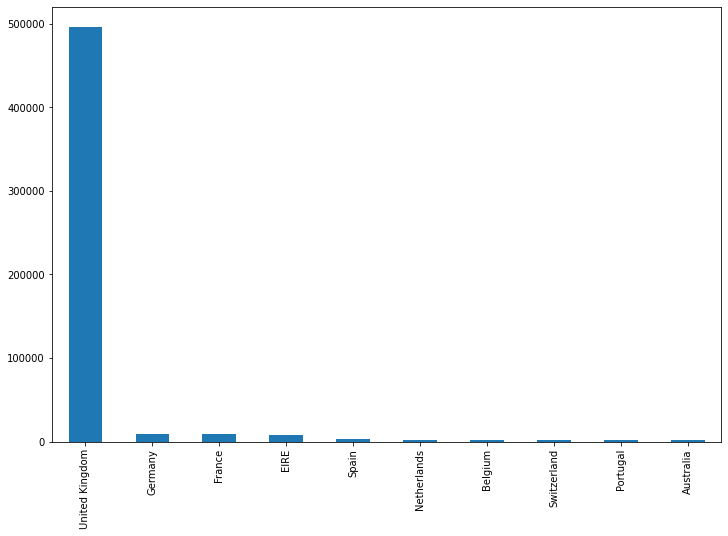

In [ ]:
df.Country.value_counts().head(10).plot.bar(figsize=(12,8))

In [ ]:
# number of unique items in stock
len(df['StockCode'].unique())

4070

In [ ]:
len(df['Description'].unique())

4224

In [ ]:
len(df['UnitPrice'].unique())

1630

Number of unique item stock codes: 4070

Number of unique item descriptions: 4224 

Number of unique item price is : 1630

Two items can have same price so mismatch of item stock codes and prices are not an issue.

But items description for each unique stock code should be different.So the number of unique item stock codes and unique item description should be same.But this is not true in our case.So we have to investigate it a bit.

In [ ]:
#Find out the stock units that have more than one description
dfStockdesc = df.groupby(["StockCode","Description"]).count().reset_index()
dfStockdesc.head(5)

,StockCode,Description,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,10002,INFLATABLE POLITICAL GLOBE,71,71,71,71,49,71
1,10080,GROOVY CACTUS INFLATABLE,22,22,22,22,21,22
2,10080,check,1,1,1,1,0,1
3,10120,DOGGY RUBBER,30,30,30,30,30,30
4,10125,MINI FUNKY DESIGN TAPES,94,94,94,94,64,94


In [ ]:
df_analyze=dfStockdesc.StockCode.value_counts()[dfStockdesc.StockCode.value_counts()>1].reset_index()

In [ ]:
df_analyze

,index,StockCode
0,20713,8
1,23084,7
2,85175,6
3,21830,6
4,72807A,5
...,...,...
645,22458,2
646,21843,2
647,37471,2
648,17136A,2


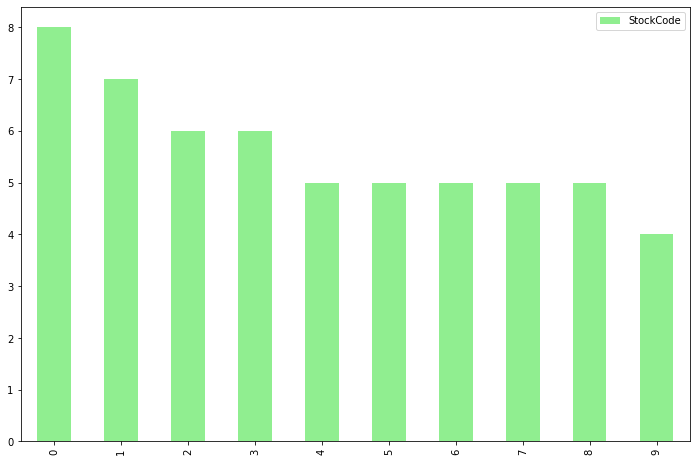

In [ ]:
df_analyze.head(10).plot.bar(figsize=(12,8),color ='lightgreen')

In [ ]:
df_analyze.head()

,index,StockCode
0,20713,8
1,23084,7
2,21830,6
3,85175,6
4,21181,5


In [ ]:
#analyzing different description .
df[df['StockCode'] ==  dfStockdesc.StockCode.value_counts()[dfStockdesc.StockCode.value_counts()>1].reset_index()['index'][6]]['Description'].unique()

array(['MISTLETOE HEART WREATH CREAM', 'MISELTOE HEART WREATH WHITE',
       'MISELTOE HEART WREATH CREAM', '?', 'had been put aside', nan],
      dtype=object)

So,there are different description due to typing error.It can be true since they are typed by humans,so there is always a chance of error.

In [36]:
df=df[~df['CustomerID'].isnull()]
df.shape

(406829, 8)

In [37]:
df=df[~df.duplicated()]
df.shape

(401604, 8)

In [38]:
df=df[~df.Quantity<0]

In [39]:
df.shape

(392732, 8)

In [40]:
df["Amount"] = df["Quantity"] * df["UnitPrice"]
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [41]:
df_customer_frequency =df['CustomerID'].value_counts().reset_index()
df_customer_frequency.columns=['CustomerID','Frequency']

In [42]:
df_customer_frequency

,CustomerID,Frequency
0,17841.0,7676
1,14911.0,5672
2,14096.0,5111
3,12748.0,4413
4,14606.0,2677
...,...,...
4334,18233.0,1
4335,18184.0,1
4336,17846.0,1
4337,14090.0,1


In [43]:
#Amount spent by the customers
dfCustomerHistory = df.groupby("CustomerID")['Amount'].sum().reset_index()

In [44]:
dfCustomerHistory

,CustomerID,Amount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2045.53


In [45]:
new_df= pd.merge(df_customer_frequency,dfCustomerHistory,on='CustomerID',how='outer')

In [46]:
new_df

,CustomerID,Frequency,Amount
0,17841.0,7676,40519.84
1,14911.0,5672,143711.17
2,14096.0,5111,65164.79
3,12748.0,4413,33053.19
4,14606.0,2677,12076.15
...,...,...,...
4334,18233.0,1,440.00
4335,18184.0,1,49.80
4336,17846.0,1,2033.10
4337,14090.0,1,76.32


In [48]:
IQR=new_df.Amount.quantile(0.75)-new_df.Amount.quantile(0.25)
u_lim=new_df.Amount.quantile(0.75)+1.5*IQR
l_lim=new_df.Amount.quantile(0.25)-1.5*IQR
print(u_lim,l_lim)
df=new_df[(new_df['Amount']>l_lim)&(new_df['Amount']<u_lim)]

3691.1050000000023 -1724.3350000000014


In [50]:
IQR=new_df.Frequency.quantile(0.75)-new_df.Frequency.quantile(0.25)
u_lim_freq=new_df.Frequency.quantile(0.75)+1.5*IQR
l_lim_freq=new_df.Frequency.quantile(0.25)-1.5*IQR
print(u_lim_freq,l_lim_freq)
new_df=new_df[(new_df['Frequency']>l_lim_freq)&(new_df['Frequency']<u_lim_freq)]

219.5 -104.5


Now,the range of "Amount column" in our new_df is very large.So we will use Standard Scaler transformstion for better visualization

We will also apply standarscaler transformation on "frequency" column for better visualization.

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaled_df = new_df.copy()

In [53]:
col_names = ['Frequency', 'Amount']
features = scaled_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [67]:
scaled_df[col_names] = features
print(scaled_df)

      CustomerID  Frequency    Amount
381      12378.0   3.287895  0.700732
382      15531.0   3.287895  0.182786
383      17861.0   3.287895  0.214706
384      13013.0   3.287895  0.904814
385      15351.0   3.287895  0.173188
...          ...        ...       ...
4334     18233.0  -1.040272 -0.207001
4335     18184.0  -1.040272 -0.306254
4336     17846.0  -1.040272  0.198228
4337     14090.0  -1.040272 -0.299509
4338     16093.0  -1.040272 -0.314597

[3958 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f42d51ff5d0>,
                 k=None, metric=None, model=None, timings=True)

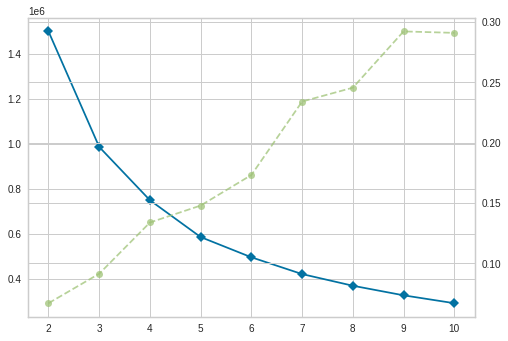

In [55]:
#Finding optimum number of clusters by elbow method
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans(), k=10)
model.fit(scaled_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f42d9c8a190>,
                 k=None, metric=None, model=None, timings=True)

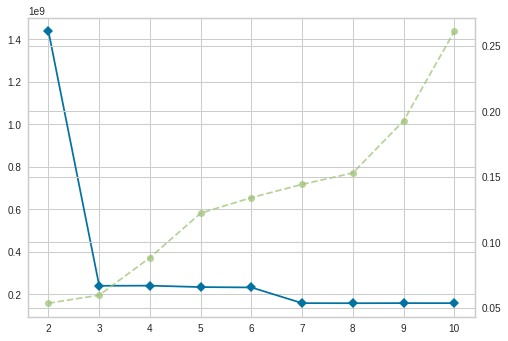

In [60]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KElbowVisualizer(KMeans(), k=10)
model.fit(new_df)

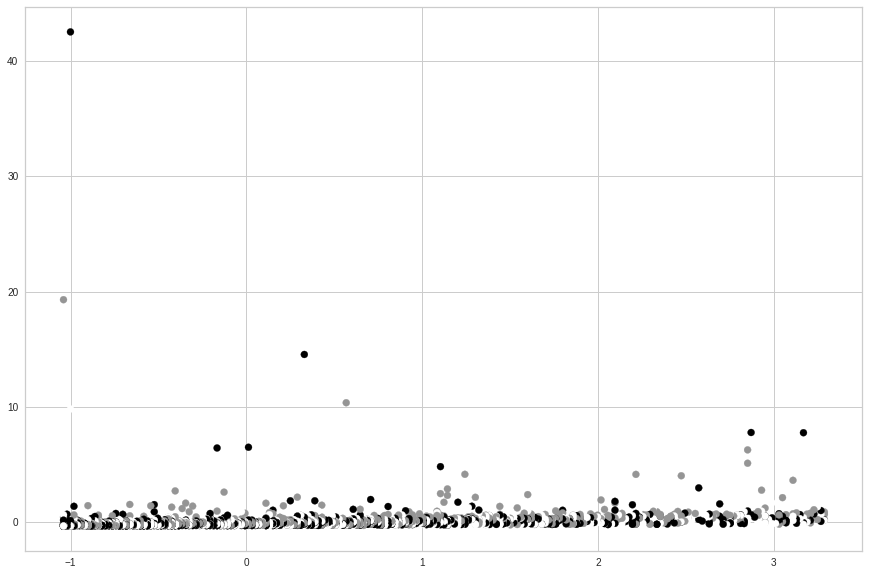

In [68]:
plt.figure(figsize=[15,10])
kmean=KMeans(n_clusters=3)
kmean.fit(scaled_df)
ymean=kmean.predict(scaled_df)
plt.scatter(scaled_df['Frequency'],scaled_df['Amount'],c=ymean)
plt.show()

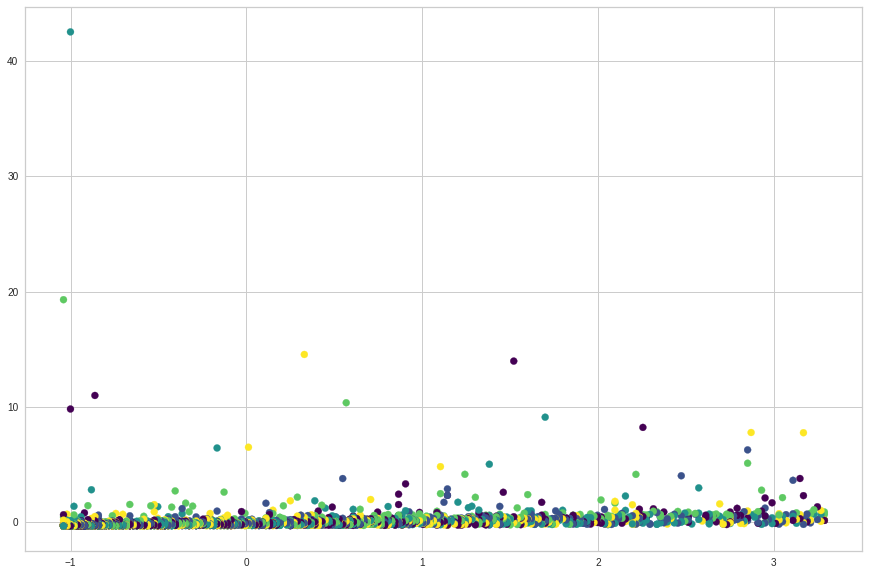

In [75]:
plt.figure(figsize=(15,10))
labels = KMeans(5, random_state=100).fit_predict(scaled_df)
plt.scatter(scaled_df['Frequency'], scaled_df['Amount'], c=labels, cmap='viridis')

In [ ]:
#Clustering the data 

In [55]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [72]:
X= scaled_df.values

For n_clusters = 2 The average silhouette_score is : 0.6227021867439704
For n_clusters = 3 The average silhouette_score is : 0.5913666480836154
For n_clusters = 4 The average silhouette_score is : 0.5692276888337903
For n_clusters = 5 The average silhouette_score is : 0.5651205607923543
For n_clusters = 6 The average silhouette_score is : 0.5535493710307728
For n_clusters = 8 The average silhouette_score is : 0.5455632363022053


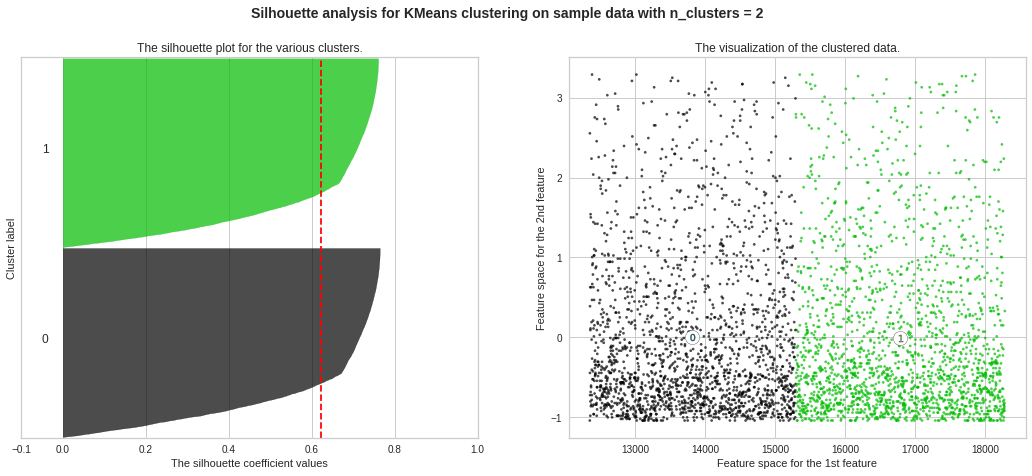

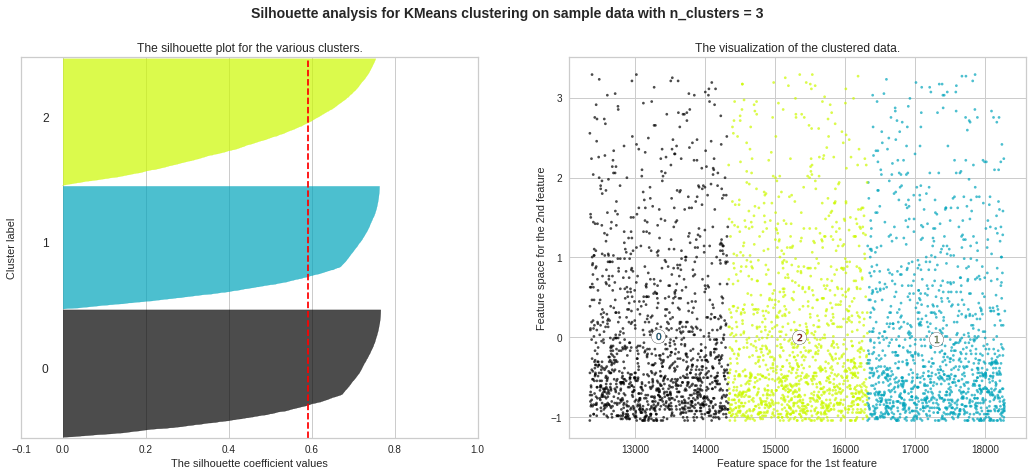

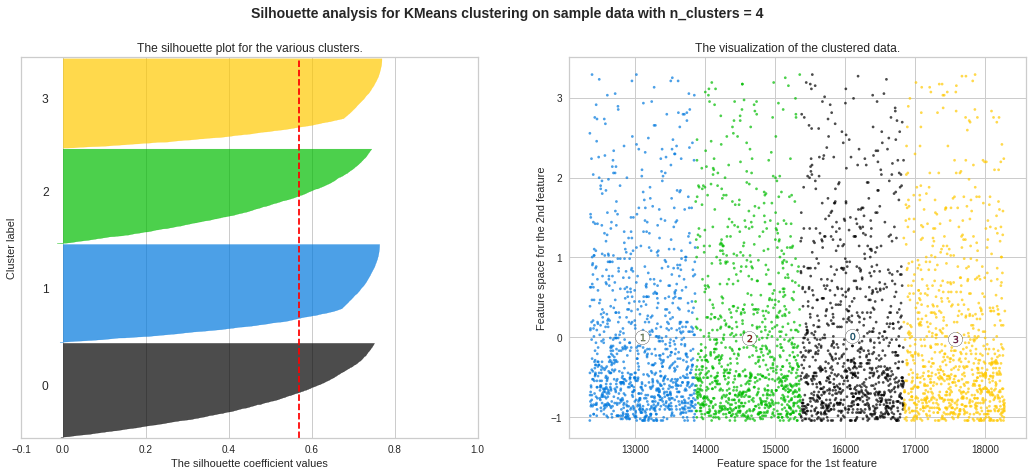

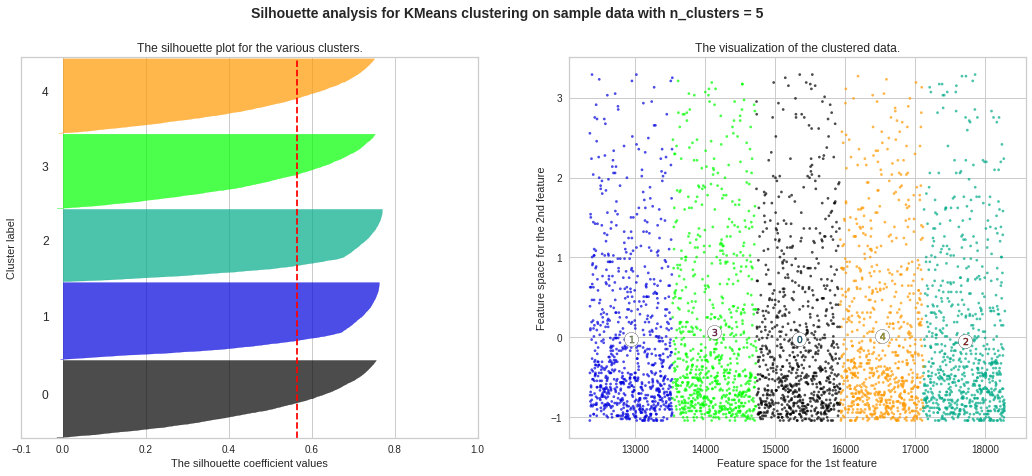

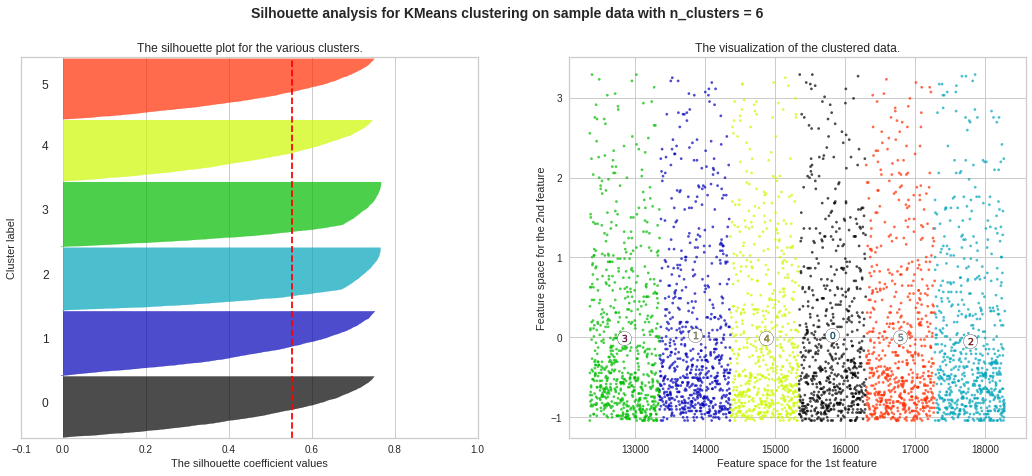

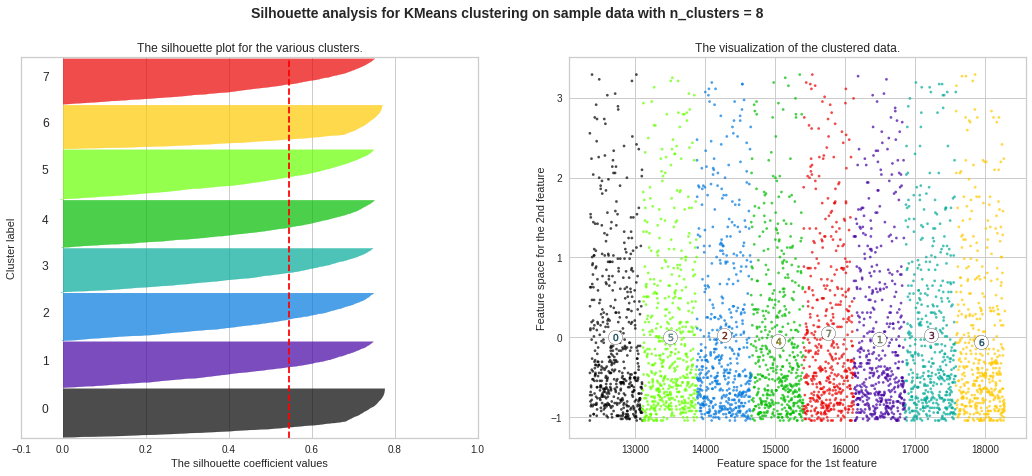

In [73]:
range_n_clusters = [2, 3, 4, 5, 6,8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From the Above analysis we can come to a conclusion that 3 clusters are ideal for this dataset.

#Observations and Inferences:
   1.Three Clusters (Customer Segments):
Carefully examining the three cluster classification, we observe following groups of customers:

###High value customer:
'Cluster 2' is the high value customer segment for the online retails store as the customers in this group place the highest value orders with a very high relative frequency than other members. 

###Medium value customer:
'Cluster 0' appears to be the medium valued customer segment. These customers place an order of a considerable amount, though not as much as high valued customers, but still quite higher than low valued customers. Also, their orders are relatively more frequent than the lowest value segment.

###Low value customer:
It is quite evident that 'Cluster 1' has customers who rarely shop and when they order, their orders are pretty low valued. Apart from the numbers, the visualization of clusters in Silhoutte Analysis show that all three customer segments are quite distinct with very less overlapp between them.

#Conclusion:
The customer segments thus deduced can be very useful in targeted marketing, scouting for new customers and ultimately revenue growth. After knowing the types of customers, it depends upon the retailer policy whether to chase the high value customers and offer them better service and discounts or try and encourage low/ medium value customers to shop more freqently or of higher monetary values.